# **Data Loading**

In [1]:
import json
import os
import random


# List files in the directory
file_path = '/kaggle/input/news-category-dataset'
file_list = os.listdir(file_path)
print("Files in the directory:", file_list)

json_file = os.path.join(file_path, file_list[0])  
print(f"Using file: {json_file}")

# Function to process the JSON file
def process_file(file_path):
    news = []
    with open(file_path, 'r') as file:
        for line in file:
            json_object = json.loads(line)
            news.append(json_object)
    return news

# Process the file and store the result in the 'news' variable
news = process_file(json_file)
news = random.sample(news, 15000)  #A 30000 samole from the total news
print(f"Number of news articles in the dataset: {len(news)}")


Files in the directory: ['News_Category_Dataset_v3.json']
Using file: /kaggle/input/news-category-dataset/News_Category_Dataset_v3.json
Number of news articles in the dataset: 15000


Files in the directory: ['News_Category_Dataset_v3.json']
Using file: /kaggle/input/news-category-dataset/News_Category_Dataset_v3.json
Number of news articles in the dataset: 7500


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


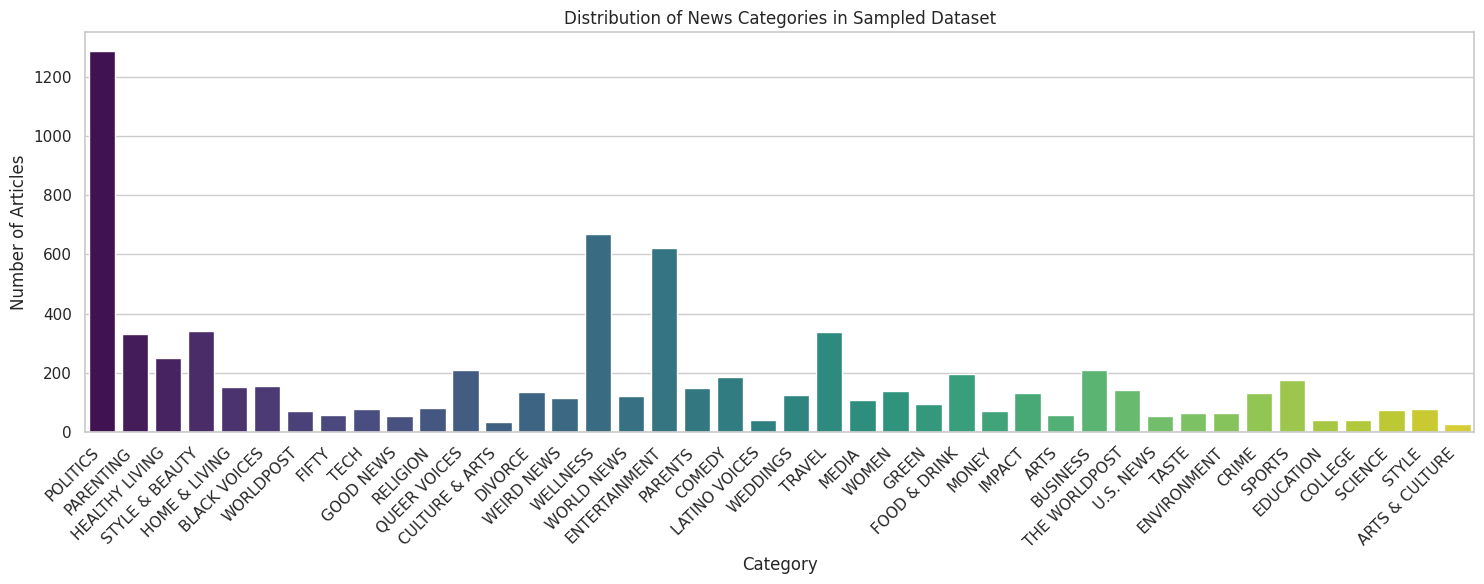

In [2]:
import json
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set seaborn style for prettier plots
sns.set(style="whitegrid")

# Your existing code
file_path = '/kaggle/input/news-category-dataset'
file_list = os.listdir(file_path)
print("Files in the directory:", file_list)

json_file = os.path.join(file_path, file_list[0])
print(f"Using file: {json_file}")

def process_file(file_path):
    news = []
    with open(file_path, 'r') as file:
        for line in file:
            json_object = json.loads(line)
            news.append(json_object)
    return news

news = process_file(json_file)
news = random.sample(news, 7500)
print(f"Number of news articles in the dataset: {len(news)}")

# Count category occurrences
category_counts = Counter(article['category'] for article in news)

# Convert to lists for plotting
categories = list(category_counts.keys())
counts = list(category_counts.values())

# Plotting
plt.figure(figsize=(15, 6))
sns.barplot(x=categories, y=counts, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.title("Distribution of News Categories in Sampled Dataset")
plt.tight_layout()
plt.show()


In [ ]:
import json
import os
import random
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Load data
file_path = '/kaggle/input/news-category-dataset'
file_list = os.listdir(file_path)
json_file = os.path.join(file_path, file_list[0])

def process_file(file_path):
    news = []
    with open(file_path, 'r') as file:
        for line in file:
            json_object = json.loads(line)
            news.append(json_object)
    return news

# Load and shuffle
news = process_file(json_file)
random.shuffle(news)

# Group news by category
category_groups = defaultdict(list)
for article in news:
    category = article['category']
    category_groups[category].append(article)

# Find the minimum category size
min_size = min(len(articles) for articles in category_groups.values())

# Optionally: Set a cap to avoid using too few samples (optional)
cap = min(min_size, 200)  # Max 500 per category, adjust if needed

# Balance dataset
balanced_news = []
for category, articles in category_groups.items():
    sampled_articles = random.sample(articles, min(cap, len(articles)))
    balanced_news.extend(sampled_articles)

print(f"Balanced dataset size: {len(balanced_news)}")

# Count category occurrences
category_counts = Counter(article['category'] for article in balanced_news)

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()), palette="magma")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.title("Balanced Distribution of News Categories")
plt.tight_layout()
plt.show()


Balanced dataset size: 8400


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


In [ ]:
# Initialize dictionaries for label-to-index and index-to-label mappings
label_to_index = {}
index_to_label = {}

# Iterate over the news items, which is a list of dictionaries containing 'headline', 'short_description', and 'category'
i = 0
for news_item in balanced_news:
    label = news_item['category']  # Corrected to use 'category' as the label
    if label not in label_to_index:
        label_to_index[label] = i  # Assign the index for the label
        index_to_label[i] = label  # Map index to label
        i += 1  # Increment the index for the next unique label

# Now you have the label-to-index and index-to-label dictionaries
print("Label to Index Mapping:", label_to_index)
print("Index to Label Mapping:", index_to_label)


# **Loading BertTokenizer**

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
# Load the pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


In [ ]:
# Check if GPU is available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


In [ ]:
# Move the model to the GPU
model = model.to(device)


# **Tokenizing and embedding**

In [ ]:
import torch
from torch.nn.utils.rnn import pad_sequence
from transformers import AutoTokenizer, AutoModel

# Load pre-trained BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Tokenize and embed a single news item using BERT
def tokenize_and_embed(news_item, max_len=128):
    text = news_item['headline'] + " " + news_item['short_description']
    
    # Tokenize the text
    inputs = tokenizer(
        text,
        return_tensors='pt',
        padding='max_length',
        truncation=True,
        max_length=max_len
    )
    
    # Move inputs to GPU
    inputs = {key: val.to(device) for key, val in inputs.items()}
    
    # Get embeddings from BERT
    with torch.no_grad():
        outputs = model(**inputs)
        last_hidden_state = outputs.last_hidden_state  # [1, seq_len, 768]
    
    return last_hidden_state.squeeze(0)  # [seq_len, 768]

# Apply the embedding function to all news items
# Make sure `news` is a list of dictionaries with keys 'headline' and 'short_description'
embeddings = [tokenize_and_embed(item) for item in balanced_news]  # List of [seq_len, 768] tensors

# Pad sequences to the same length (max_seq_len, typically 128)
padded_embeddings = pad_sequence(embeddings, batch_first=True)  # [num_samples, max_seq_len, 768]

# Check final shape
print(f"Padded embeddings shape: {padded_embeddings.shape}")  # Expected: [N, max_len, 768]


In [ ]:
# Map the labels to their respective indices
labels = [label_to_index[news_item['category']] for news_item in balanced_news]

# Convert labels to a tensor and move to GPU
labels_tensor = torch.tensor(labels).to(device)

print(labels_tensor.shape)  # Should be (num_samples,)


# **Data Splitting**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ensure data is on CPU for splitting (train_test_split does not support CUDA tensors)
X_cpu = padded_embeddings.cpu()
y_cpu = labels_tensor.cpu()

# Split the data: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X_cpu, y_cpu, test_size=0.3, random_state=42, stratify=y_cpu)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Move tensors back to the correct device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train = X_train.to(device)
X_val = X_val.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_val = y_val.to(device)
y_test = y_test.to(device)

# Confirm tensor shapes
print(f"Train set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")


# **Data Reshaping**

# **First Model: BiLSTM**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class BiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout=0.3):
        super(BiLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # BiLSTM layer with dropout for regularization
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True, 
                            bidirectional=True, dropout=dropout)

        # Add Batch Normalization
        self.batch_norm = nn.BatchNorm1d(hidden_size * 2)  # After BiLSTM output

        # Fully connected layer with regularization (dropout)
        self.fc = nn.Linear(hidden_size * 2, num_classes)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x):
        # Pass through BiLSTM layer
        out, _ = self.lstm(x)

        # Get the last hidden state
        out = out[:, -1, :]  # Take the last hidden state

        # Apply batch normalization
        out = self.batch_norm(out)

        # Apply dropout regularization
        out = self.dropout(out)

        # Pass through fully connected layer
        out = self.fc(out)
        return out

# Initialize the BiLSTM model
input_size = 768  # Size of BERT embeddings
hidden_size = 64  
num_layers = 3  
num_classes = 42
dropout = 0.3  # Dropout rate

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BiLSTM_model = BiLSTM(input_size, hidden_size, num_layers, num_classes, dropout).to(device)

# Optimizer and Loss function
optimizer = optim.Adam(BiLSTM_model.parameters(), lr=0.0005, weight_decay=1e-5)  # Added L2 regularization
criterion = nn.CrossEntropyLoss()

print(f"Model initialized and moved to device: {device}")


In [ ]:
# Function to train the model
def train_and_evaluate(X_train, y_train, X_val, y_val, model, optimizer, criterion, epochs=10, batch_size=32):
    model.train()  # Set the model to training mode
    for epoch in range(epochs):
        total_loss = 0
        total_correct = 0
        total_samples = 0

        # Loop over the training data in batches
        for i in range(0, len(X_train), batch_size):
            batch_inputs = torch.tensor(X_train[i:i+batch_size]).to(device)
            batch_labels = torch.tensor(y_train[i:i+batch_size]).to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(batch_inputs)
            loss = criterion(outputs, batch_labels)

            # Backward pass
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total_correct += (predicted == batch_labels).sum().item()
            total_samples += batch_labels.size(0)

        # Print loss and accuracy for each epoch
        epoch_loss = total_loss / len(X_train)
        epoch_acc = total_correct / total_samples
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc*100:.2f}%")

        # Validation
        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():
            val_inputs = torch.tensor(X_val).to(device)
            val_labels = torch.tensor(y_val).to(device)
            val_outputs = model(val_inputs)
            _, val_predicted = torch.max(val_outputs, 1)
            val_acc = accuracy_score(val_labels.cpu(), val_predicted.cpu())
            print(f"Validation Accuracy: {val_acc*100:.2f}%")
        model.train()  # Set the model back to training mode

    return model

In [ ]:
# Training the model
trained_model = train_and_evaluate(X_train, y_train, X_val, y_val, 
                                   BiLSTM_model, optimizer, criterion, epochs=20, batch_size=32)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def test_and_evaluate(model, X_test, y_test, index_to_label, batch_size=32):
    # Convert test data to torch tensors
    test_data = torch.utils.data.TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)
    
    # Move the model to the device (GPU or CPU)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    # Evaluation phase
    model.eval()  # Set model to evaluation mode
    test_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_accuracy = 100 * correct / total
    test_loss = test_loss / len(test_loader)

    # Map numerical indices to class names
    class_names = [index_to_label[idx] for idx in range(len(index_to_label))]
    
    # Calculate classification report
    report = classification_report(all_labels, all_preds, target_names=class_names)

    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')
    print(f'Classification Report:\n{report}')

    # Plot the confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return test_accuracy, report, cm



In [ ]:
# Evaluate the trained model on the test set
test_accuracy, report, cm = test_and_evaluate(trained_model, X_test, y_test,index_to_label, 32)

# **Second Model: Transformer**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class TransformerClassifier(nn.Module):
    def __init__(self, input_dim, num_classes, num_heads=6, dropout=0.5, num_layers=2):
        super(TransformerClassifier, self).__init__()

        # Transformer layer
        self.transformer_encoder = torch.nn.MultiheadAttention(embed_dim=input_dim, num_heads=num_heads,
                                                               dropout=dropout, batch_first=True)
        self.norm = nn.LayerNorm(input_dim)
        
        # Fully connected Head
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        # Transformer Encoder
        output, _ = self.transformer_encoder(x, x, x, need_weights=False)
        
        # Apply layer normalization
        output = self.norm(output)
        
        # Take the average over all attention (hidden) states
        output = torch.mean(output, dim=1)
        
        # Fully Connected Layer for Classification
        output = self.fc(output)
        
        return output


In [ ]:
# Initialize the Transformer model
input_dim = 768  
num_classes = 42  
num_heads = 6 
dropout = 0.5 
num_layers = 2  

# Initialize the Transformer model
transformer_model = TransformerClassifier(input_dim, num_classes, num_heads, dropout, num_layers)

# Optimizer and Loss function
optimizer = optim.Adam(transformer_model.parameters(), lr=0.00005)
criterion = nn.CrossEntropyLoss()

# Check the device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transformer_model = transformer_model.to(device)


In [ ]:
def train_and_evaluate_transformer(X_train, y_train, X_val, y_val, model, optimizer, criterion, epochs=10, batch_size=32):
    # Convert data to torch tensors
    train_data = torch.utils.data.TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
    val_data = torch.utils.data.TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long))
    
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)
    
    # Move the model to the device (GPU or CPU)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    # Training Loop
    for epoch in range(epochs):
        model.train()  # Set model to training mode
        train_loss = 0
        correct = 0
        total = 0

        # Train phase
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)  # Forward pass
            
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_accuracy = 100 * correct / total
        
        # Validation phase
        model.eval()  # Set model to evaluation mode
        val_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_accuracy = 100 * correct / total

        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%')
        print(f'Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%')

    return model


In [ ]:
# Assuming you have the reshaped training and validation data: X_train_reshaped, X_val_reshaped, y_train, y_val
trained_model_transformer = train_and_evaluate_transformer(X_train, y_train, X_val, y_val, 
                                                          transformer_model, optimizer, criterion, epochs=20, batch_size=32)


In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def test_and_evaluate(model, X_test, y_test, index_to_label, batch_size=32):
    # Convert test data to torch tensors
    test_data = torch.utils.data.TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)
    
    # Move the model to the device (GPU or CPU)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    # Evaluation phase
    model.eval()  # Set model to evaluation mode
    test_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_accuracy = 100 * correct / total
    test_loss = test_loss / len(test_loader)

    # Map numerical indices to class names
    class_names = [index_to_label[idx] for idx in range(len(index_to_label))]
    
    # Calculate classification report
    report = classification_report(all_labels, all_preds, target_names=class_names)

    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')
    print(f'Classification Report:\n{report}')

    # Plot the confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return test_accuracy, report, cm


In [ ]:
# Call the test_and_evaluate function
test_accuracy, report, cm = test_and_evaluate(
    model=trained_model_transformer,        # The trained model
    X_test=X_test,      # Test data features
    y_test=y_test,              # Test data labels
    index_to_label=index_to_label,  # Dictionary mapping indices to labels
    batch_size=32               # Batch size for DataLoader
)

# Print outputs for reference
print("Test Accuracy:", test_accuracy)
print("Classification Report:")
print(report)

# **Saving the model**

In [ ]:
torch.save(trained_model_transformer.state_dict(), "best_transformer_model.pth")


# **User input function**

In [ ]:
from transformers import AutoTokenizer, BertForSequenceClassification
import torch

# Function to predict the class based on logits
def predict_category(logits):
    # Get the predicted class (index of highest logit)
    predicted_class = torch.argmax(logits, dim=-1).item()
    return predicted_class

# Function to tokenize and get logits from the model
def tokenize_and_embed_text(text, tokenizer, model, device):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.logits

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load the saved model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=42).to(device)
model.load_state_dict(torch.load('best_transformer_model.pth'), strict=False)
model.eval()

# Example text
text = """Football Final Match is on onsport """
# Predict category
logits = tokenize_and_embed_text(text, tokenizer, model, device)
predicted_class = predict_category(logits)

print(f"Predicted class: {predicted_class}")


In [ ]:

# Example mapping (you can replace with your actual class names)
index_to_label = {
    0: 'COMEDY', 1: 'IMPACT', 2: 'POLITICS', 3: 'WELLNESS', 4: 'SPORTS', 5: 'PARENTS', 
    6: 'HEALTHY LIVING', 7: 'TASTE', 8: 'THE WORLDPOST', 9: 'BLACK VOICES', 10: 'ENTERTAINMENT', 
    11: 'BUSINESS', 12: 'ARTS', 13: 'TECH', 14: 'WORLD NEWS', 15: 'FOOD & DRINK', 16: 'FIFTY', 
    17: 'WOMEN', 18: 'STYLE & BEAUTY', 19: 'MEDIA', 20: 'PARENTING', 21: 'STYLE', 22: 'WEIRD NEWS', 
    23: 'EDUCATION', 24: 'WORLDPOST', 25: 'HOME & LIVING', 26: 'QUEER VOICES', 27: 'RELIGION', 
    28: 'WEDDINGS', 29: 'CRIME', 30: 'MONEY', 31: 'TRAVEL', 32: 'ENVIRONMENT', 33: 'GOOD NEWS', 
    34: 'DIVORCE', 35: 'U.S. NEWS', 36: 'GREEN', 37: 'COLLEGE', 38: 'SCIENCE', 39: 'LATINO VOICES', 
    40: 'CULTURE & ARTS', 41: 'ARTS & CULTURE'
}

# Map the predicted index to the category label
predicted_category = index_to_label.get(predicted_class, "Unknown")

print(f"Predicted category: {predicted_category}")
